In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import acquire
import summarize
import prepare

In [2]:
df = acquire.get_mallcustomer_data()

df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.set_index('customer_id')

In [4]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
from summarize import df_summary

In [6]:
info, describe, nulls, value_count = df_summary (df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [7]:
describe

,age,annual_income,spending_score
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


In [8]:
nulls

gender                           0.00
age                              0.00
annual_income                    0.00
spending_score                   0.00
dtype: float64

In [9]:
value_count

gender  age  annual_income  spending_score
Male    70   49             55                1
Female  38   64             42                1
        43   48             50                1
        42   34             17                1
        41   103            17                1
                                             ..
Male    26   54             54                1
        25   77             12                1
             24             73                1
        24   60             52                1
Female  18   65             48                1
Length: 200, dtype: int64

# Filter Columns and Missing Values

In [10]:
from prepare import data_prep

In [11]:
df = prepare.data_prep(
    df,
    cols_to_remove=[],
    prop_required_column=.6,
    prop_required_row=.75
)

In [12]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [13]:
def make_dummies(df):
    dummy_df = pd.get_dummies(df[["gender"]], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    df = df.drop(columns = ['gender'])
    return df

In [14]:
df = make_dummies(df)

In [15]:
df.head()

,age,annual_income,spending_score,gender_Male
customer_id,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


# Outliers

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'annual_income'}>],
       [<AxesSubplot:title={'center':'spending_score'}>,
        <AxesSubplot:title={'center':'gender_Male'}>]], dtype=object)

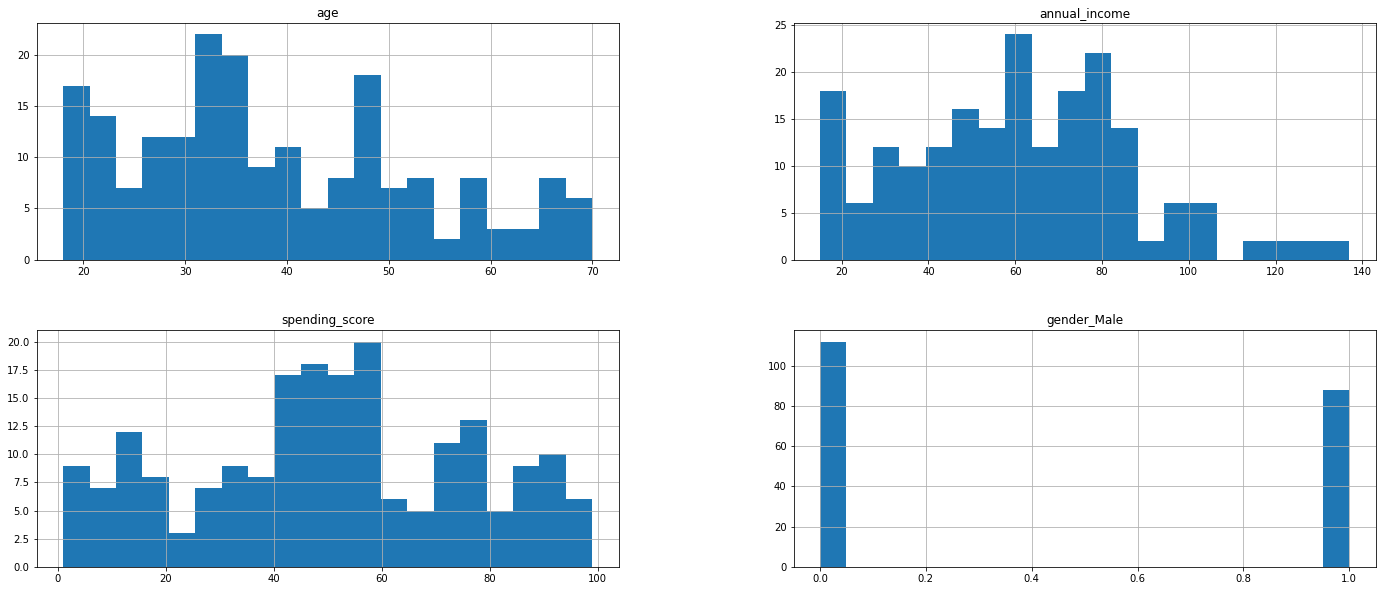

In [16]:
df.hist(figsize=(24, 10), bins=20)

# IQR

In [17]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

add_upper_outlier_columns(df, k=1.5)

df.head()

,age,annual_income,spending_score,gender_Male,age_outliers,annual_income_outliers,spending_score_outliers,gender_Male_outliers
customer_id,,,,,,,,
1,19,15,39,1,0,0.00,0,0
2,21,15,81,1,0,0.00,0,0
3,20,16,6,0,0,0.00,0,0
4,23,16,77,0,0,0.00,0,0
5,31,17,40,0,0,0.00,0,0


In [18]:
outlier_cols = [col for col in df if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df[col][df[col] > 0]
    print(data.describe())

~~~
age_outliers
count                   0.00
mean                     nan
std                      nan
min                      nan
25%                      nan
50%                      nan
75%                      nan
max                      nan
Name: age_outliers, dtype: float64
~~~
annual_income_outliers
count                   2.00
mean                    4.25
std                     0.00
min                     4.25
25%                     4.25
50%                     4.25
75%                     4.25
max                     4.25
Name: annual_income_outliers, dtype: float64
~~~
spending_score_outliers
count                   0.00
mean                     nan
std                      nan
min                      nan
25%                      nan
50%                      nan
75%                      nan
max                      nan
Name: spending_score_outliers, dtype: float64
~~~
gender_Male_outliers
count                   0.00
mean                     nan
std                    

In [19]:
df = df.drop(columns = ['age_outliers', 'annual_income_outliers', 'spending_score_outliers', 'gender_Male_outliers'])


# Split Data

In [20]:
from prepare import data_split

In [21]:
X_train, y_train, X_validate, y_validate, X_test, y_test = data_split(df, stratify_by='spending_score')

In [22]:
X_train.head()

,age,annual_income,gender_Male
customer_id,,,
124,39,69,1
77,45,54,0
172,28,87,1
11,67,19,1
36,21,33,0


<AxesSubplot:>

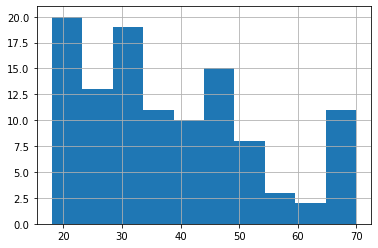

In [23]:
X_train.age.hist()

<AxesSubplot:>

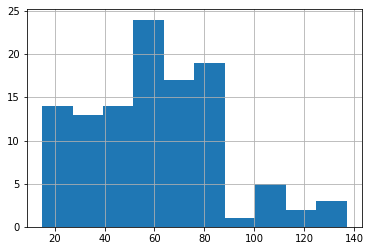

In [24]:
X_train.annual_income.hist()

# Scale Data

In [25]:
from prepare import minmax_scale

In [26]:
X_train, X_validate, X_test = minmax_scale(X_train, X_validate, X_test)

<AxesSubplot:>

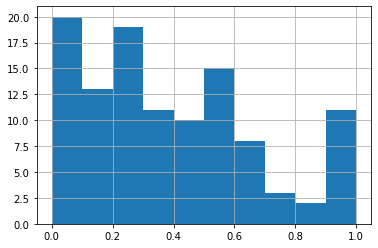

In [27]:
X_train.age.hist()

<AxesSubplot:>

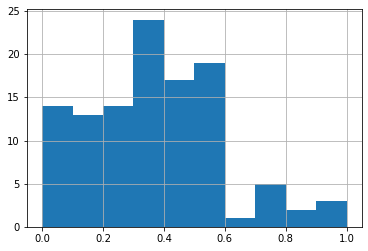

In [28]:
X_train.annual_income.hist()